In [13]:
from sklearn.cluster import KMeans
from sklearn import cluster
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [14]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
print(df.size)
print(df.shape)

1000
(200, 5)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Preprocessing

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = pd.DataFrame(scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]), columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
new_df

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


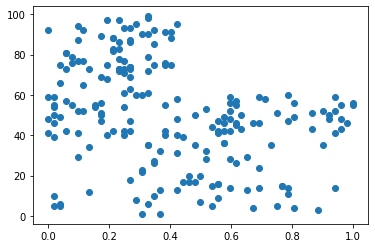

In [20]:
plt.scatter(new_df["Age"], df['Spending Score (1-100)'])

### Kmeans 

In [21]:
k_rng = range(1, 10)
error = []
for k in k_rng:
    km = cluster.KMeans(n_clusters=k, init = 'k-means++', random_state=4)
    km.fit(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']])
    error.append(km.inertia_)

D:\programs\anaconda\envs\tf-2\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [22]:
error

[308812.78,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75350.77917248776,
 58302.40630860365,
 51525.773770373744,
 44309.83640371743,
 40573.69766497867]

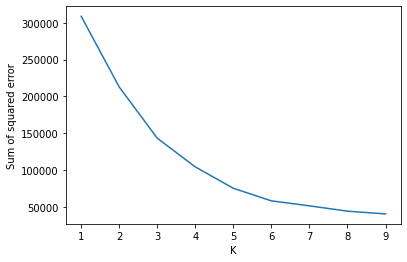

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, error)

In [24]:
km = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)
km.fit(new_df)

KMeans(n_clusters=5, random_state=0)

### Predictions

In [26]:
pred = km.predict(new_df)
pred

array([3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1, 4, 1, 3, 1,
       4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1,
       4, 1, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 4, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [30]:
km.predict([[22, 55,73]])

array([2])

In [37]:
km.predict([[55, 15,20]])

array([4])